In [1]:
import numpy as np
from scipy.cluster import vq
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def loadFromTSP(filename):
    """ Inputs the TSP file named by filename, and returns a (nbrPoints,2)
    numpy array of the data points."""
    data=open(filename, 'r')
    data=data.readlines()[6:-1]
    final_data=[]
    for line in data:
        line=line.replace('\n','')
        line=line.split(" ")
        final_data.append([float(line[1]), float(line[2])])
    return np.array(final_data)

In [3]:
def avgWithinSS(data,centroids,labels):
    k = len(centroids)
    res = 0.0
    for c in range(k):
        flags = labels == c
        pointsInC = data[flags]
        def d2(p):
            delta = p - centroids[c]
            return sum(delta*delta)
        dists = np.apply_along_axis(d2,axis=1,arr=pointsInC)
        res += sum(dists)/len(pointsInC)
    return res/k

In [4]:
data = loadFromTSP('data/att48.tsp')  

In [5]:
def plotMultipleRuns(data, k, bins=20, nbrRuns=200, **kwargs):
    x=[]
    
    # Running the kmeans2, nbrRuns number of times.
    # call avgWithinSS() with the centroids and labels received from kmeans2
    # and store the values in x
    for i in range(nbrRuns):
        
        # try-except block is used here to handle cases of No cluster.
        try:  
            centroids, labels = vq.kmeans2(data, k, minit='points',missing='warn')
            x.append(avgWithinSS(data,centroids,labels))
        except:
            pass
    
    # set the figure size.
    plt.figure(figsize=(9,7))
    
    # set the color
    if 'facecolor' in kwargs:
        hist_color = kwargs['facecolor']
    else:
        hist_color = None
    
    # plot histogram 
    plt.hist(x,bins=bins, histtype='bar', ec='black',color=hist_color)
    
    # show the graph.
    plt.show()

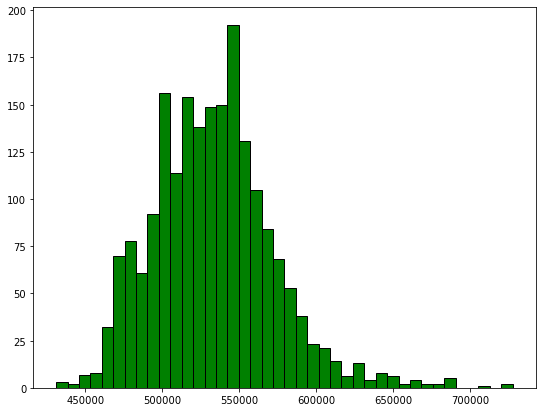

In [6]:
# Every run of Kmeans choose different centroid, Hence the data
# within a cluster will also be different and hence avgWithinSS() will return different set of values
# in every run.Therefore histogram will change everytime you run the code.
plotMultipleRuns(data, 8, 40, 2000,facecolor='green')